# **Random Process and Monte Carlo Methods**


### PROBLEM 1 (30 pts.; 50/50 for code & discussion)
**Integration with Monte Carlo methods**

_Refer to Exercise 10.5 in the Newman text_

1. Evaluate this integral
$$ I = \int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right] {\rm d}x.$$
using the "hit-or-miss" Monte Carlo method of Section 10.2 with 10,000 points. Also evaluate the error on your estimate. *(15 pts.)*

2. Now estimate the integral again using the mean value method with 10,000 points. Also evaluate the error. *(15 pts.)*

**ANSWER** \
**1.)** Adapting the code ```mcint.py``` of the "hit-or-miss" Monte Carlo method of Section 10.2 from Newman, we solve the given integral:
$$ I = \int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right] {\rm d}x.$$

In [ ]:
# importing the packages needed
import math
import random
from random import seed
import numpy as np
from numpy import sin, sqrt
import matplotlib.pyplot as plt

# defining the integral to be computed
def f(x):
  return sin(1/(x*(2-x)))**2

'''
to generate the same initial random number for both methods of integration,
we seed a pseudo-random number. for this case we're going to use
whatever random number seed(143) gives us
'''
seed(143)

# we are asked to use 10,000 random points
N = 10000

# initializing the number of points that fall within the area under the curve
count = 0

'''
we set a random number for x and y. for simplification, we will just be using the "random" number we seeded.
the for loop adds to the counter whenever a point from the 10,000 random points fall within the curve,
which given by the condition y < f(x)
'''

for i in range(N):
  x = random.random()
  y = random.random()
  if y < f(x):
    count += 1

'''
the integral is computed by I = kA/N,
with k being the counter for the points that fall within the curve
and A = 2, which will be discussed in the next two cells.
'''

I = (2*count)/N
print(I)

1.4556


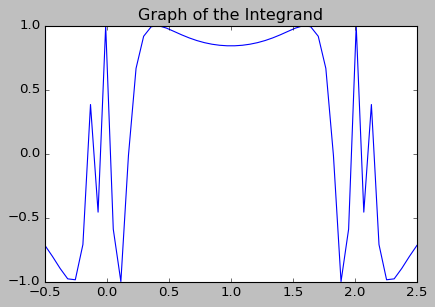

In [ ]:
xxx = np.linspace(-0.5,2.5)
yyy = sin(1/(xxx*(2-xxx)))

plt.style.use("classic")
plt.figure(figsize=(6,4))
plt.plot(xxx, yyy)
plt.title("Graph of the Integrand")

plt.show()

To evaluate the expected error on the estimated integral from the "hit-and-miss" Monter Carlo method, we use the formula below:
\begin{equation}
\sigma = \frac{\sqrt{I(A-I)}}{\sqrt{N}}
\end{equation}
where $A$ is the area of the bounding rectangle. \
\
As discussed in page 465 of Newman, the shape of the integrand shown in the figure in the previous cell, is perfectly well behaved in the middle of its range, but it varies infinitely fast at the edges. We can see here that the entire function fits in a 2 x 1 rectangle, hence, $A=2$. Also, this can easily be figured out given that this function is to be integrated from $a=0$ to $b=2$.

In [ ]:
A = 2
sigma = sqrt(I*(A-I))/sqrt(N)
print("The expected error using the hit-or-miss method is", sigma)

The expected error using the hit-or-miss method is 0.008901846100669231


**2.)** Now, we solve the integral using the mean value method.

In [ ]:
# again, as we're going to compare both of the methods,
# we use the same seed (hence same pseudo-random number) from earlier
seed(143)

'''
initializing the sum of the function for N points chosen uniformly at random between bounds a and b,
as well as the the sum of the squares of the function,
of which both will be summed in the for loop
'''

f_sum, fsq_sum = 0, 0

# we are to compute this integral with this method using the same number of random points
N = 10000

'''
again, for comparison with the other method, we assign the same thing for the x we did in the previous method,
as we are sure that this is within [0,2) because random generates points in the interval [0,1)
'''
for i in range(N):
  x = random.random()
  f_sum += f(x)
  fsq_sum += (f(x)**2)

'''
the integral for this method is computed by (b-a)/N * the sum of the function for N points
which we can clearly see that f_sum/N is the formula for mean or average
hence the name of the method
'''
I2 = 2/N * f_sum #here we use equation 10.30 from the book
print(I2)

1.4547917743867225


To evaluate the expected error on the integral using the mean value method, we use the formula:
\begin{equation}
\sigma = (b-a)\frac{\sqrt{{\rm var} f}}{\sqrt{N}}.
\end{equation}

In [ ]:
'''
variance is given by <f^2> - <f>^2
<f^2> would be what the summed squares of the function over N points
<f>^2 would be the summed function over N points which is then squared
'''
varf = (fsq_sum/N) - ((f_sum/N)**2)

sigma2 = 2 * (sqrt(varf)/sqrt(N))
print("The expected error using the mean value method is", sigma2)

The expected error using the mean value method is 0.0052189187171489205


Both of the errors for the two methods goes as $\frac{1}{\sqrt{N}}$, however the leading constant for the mean value method is smaller so this method is expected to be more accurate than the "hit-or-miss" Monte Carlo method. And we can also see this from their computed expected errors above, with the mean value method yielding a smaller error value.


### PROBLEM 2 (70 pts.; 50/50 for code & discussion)
**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(20 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(20 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(20 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(10 pts.)*

In [ ]:
# importing the packages to be used
import numpy as np
from numpy import arange, exp, sum
from numpy.random import randint, choice
from random import random
import matplotlib.pyplot as plt

**ANSWER** \
(after importing the packages to be used) We start this Markov chain Monte Carlo simulation of the Ising model by creating square lattice (N x N) for a system of 20 x 20 spins. We set up variables to hold the value ±1 of the spin on each lattice site randomly by using choice from numpy.random. \
I've decided to display the matrix so thet we can visualize what happens to the magnetization. With this pretty colormap, the blue/violet represents +1, while the red represents -1.

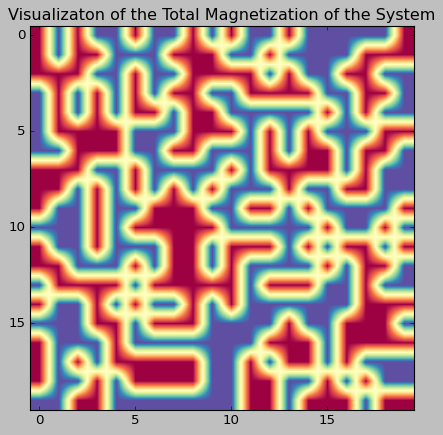

In [ ]:
N = 20
state = choice([-1,1], size = (N,N))
plt.style.use("classic")
plt.imshow(state, cmap = "Spectral")
plt.title("Visualizaton of the Total Magnetization of the System")
plt.show()

**1.)** This parts asks to write a function for $ E = -J \sum_{\langle ij \rangle} s_i s_j$, which is the total energy of the system. \
\
The goal is to let the spins interact only with those that are immediately adjacent to them on the lattice. This means that:

- A spin will have four neighbors, North, East, South, West. (Diagonals do not count for this system.)
- The corners will only have two neighbors.
- Those at the edges/sides will have three neighbors.


\
I have to admit I am not sure if what I had done is correct, but it is what I have understood. So, the plan is to comb through them:
- vertically (southwardly/going down) and stop at the bottommost row since it has no row below it to interact with
- similarly, horizontalyy (eastwardly/to the right) and stop at the rightmost row which has no row its right to interact with



It was stated that given the s1s2 interaction, there is no need for a term for the s2s1 interaction. The approach is that although a spin has neighbors on its left AND right, and on its top AND bottom, we're just going to let them interact with them interact with their neighbors on one direction each, which again, is southwardly and eastwardly. Their interactions with their neighbors on their west and north, will be taken care of the the interactions of their neighbors with them from those locations going east and going south respectively. For visualization purposes, say, we have the square lattice with entries of either a or 1:
\
\
1 1 1 1 1\
1 1 a 1 1\
1 1 1 1 1\
1 1 1 1 1\
1 1 1 1 1\
\
Exploring the interaction of **a** (only those related with a is going to be moved here) with its neighbors, following our plan, which means interactions only go downwards and to the right, the lattice now becomes:
\
\
1 1 1 1 1\
1 1 a (a1) 1\
1 1 (a1) 1 1\
1 1 1 1 1\
1 1 1 1 1\
\
**a**'s interaction with its neighbors on its top and left, will be taken care of its neighbors interaction with it. (if that makes sense huhu)
\
\
1 1 1 1 1\
1 1 (1a) (a1) 1\
1 1 (a1) 1 1\
1 1 1 1 1\
1 1 1 1 1\
\
(I've tried simulating it physically with my 4x4 rubik's cube, and it ended with only the bottom right corner left with the original color, so everything has interacted except that one.)

In [ ]:
def total_energy(state, J):
  N = len(state)

  #initializing the total energy by setting to zero, or basically an empty holder at first
  energy = 0

  for i in arange(N):
    for j in arange(N):
      if i==N-1 and j!=N-1:
        si_sj = state[i,j] * state[i,j+1]
      #with i==N-1, all rows have interacted (southwardly or going down, since j+1) with its neighboring bottom row, except the bottommost row because j!=N-1

      elif j==N-1 and i!=N-1:
        si_sj = state[i,j] * state[i+1,j]
      #with j==N-1, all columns have interacted (eastwardly or going right, since i+1) with its neighboring right row, except the rightmost row because i!=N-1

        '''
      #the two conditions above would suffice for the s1 & s2 interaction.

      now say we flip those conditions the other way around and did the following additionally:

                    elif i==N-1 and j!=0:
                        si_sj = state[i,j] * state[i,j-1]
                    elif j==N-1 and i!=0:
                        si_sj = state[i,j] * state[i-1,j]

      these will be the (respective) interactions with their neighboring rows
      northwardly (going up since j-1) and westwardly (going left since i-1)
      say, considering the first two conditions have already been executed,
      these will then just be the s2 & s1 interactions, which was said to be not needed
      if these conditions were added, it is expected that the interactions will just cancel each other out
      and yield a magnetization averaging 0 (meaning non-magnetic) after many iterations

      also, although the bottom right corner piece has not initiated any interaction,
      after running the two conditions, because of where the piece is, its neighbors has already interacted with it,
      so adding a condition for this piece, will just be the relative (between the piece and its neighbors) s2 & s1 interaction which again isnt needed
      to clarify, its top neighbor would have interacted with it for the first condition,
      and its left neighbor would have interacted with it for the second condition
        '''

      elif i!=N-1 and j!=N-1:
        si_sj = (state[i,j] * state[i+1,j]) + (state[i,j] * state[i,j+1])

      energy += -1.*si_sj
  return J*energy



**2.)** This part asks for:\
 *Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magnetization of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip.*\
 \
 So, we define this change in energy as delta_E, elaborated more in its cell.

In [ ]:
def delta_E(y,x,state):

    #initial energy before flipping
    E_i = total_energy(state,J)#calculate energy before flipping

    #choosing a spin at random and flipping it
    state[y,x] = -1*state[y,x]

    #calculating the new energy after it is flipped
    E_j = total_energy(state,J)

    #the change in energy as a result of the flip
    return E_j - E_i

Continuing on, to decide whether to accept the flip, we use the Metropolis acceptance formula,
$$P_a = \begin{cases}
      1                   & \text{if }  E_j\leq E_i \\
      {e}^{-β(E_f - E_i)} & \text{if } E_j> E_i
   \end{cases}$$

where if the move is rejected, the spin needs to be flipped back to where it was. Otherwise, the flipped spin is kept.
\
\
A simple way to implement this formula, as discussed in Newman, is to generate a random number uniformly between zero and one, which we have accomplished with the help of ```random.random()``` which yields random numbers in the interval [0,1) and accept the move if the random number is less than the exponent. We take note that if the move is accepted, the spin is kept, and if it is rejected, it is flipped back. This is reflected in the code below.


In [ ]:
def metropolis_flip(change_E,y,x,state):
    global k_B
    global T
    beta = 1
    if random() < exp(-beta*change_E):
      state[y,x] = state[y,x]
    else:
      state[y,x] = -1*state[y,x]
    return state

**3.)** This part asks to make a plot of the total magnetization of the system as a function of time for a million Monte Carlo steps. We start with the cell below:

In [ ]:
#calculates the total magnetization of the system
def magnetization(state):
    global N
    return sum(state)/N

We initialize an empty list ```M = []```to contain the magnetization of the system for each iteration. In the for loop also comes in what were defined in part 2. So the process goes as follows:
- choosing a spin at random where we use randint which generates random integers with interval [0,N) and flip it
- we compute the change in energy via delta_E
- the metropolis acceptance formula decides whether to accept the flip or not
- total magnetization of the system is calculated and added to the list
- the loop is iterated over a thousand Monte Carlo steps, then ten thousand, then finally one million.

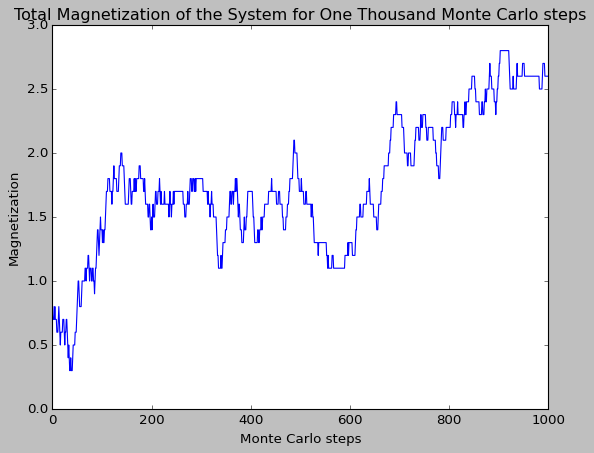

In [ ]:
#defining the constants
N = 20     #lattice size
J = 1      #interaction constant
k_B = 1    #Boltzmann constant
T = 1      #Temperature

iterations = 1000
M = []
for i in range(iterations+1):
    y,x = randint(0,N), randint(0,N)

    change_E = delta_E(y,x,state)

    state = metropolis_flip(change_E,y,x,state)

    total_magnetization = magnetization(state)
    M.append(total_magnetization)


plt.plot(arange(iterations+1), M)
plt.title("Total Magnetization of the System for One Thousand Monte Carlo steps")
plt.xlabel("Monte Carlo steps")
plt.ylabel("Magnetization")
plt.show()

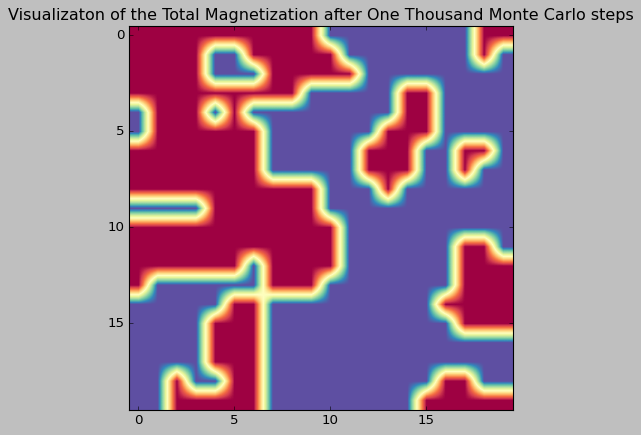

In [ ]:
plt.style.use("classic")
plt.imshow(state, cmap = "Spectral")
plt.title("Visualizaton of the Total Magnetization after One Thousand Monte Carlo steps")
plt.show()

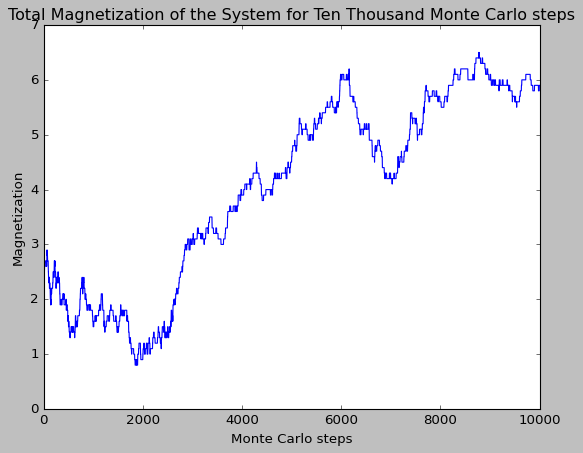

In [ ]:
iterations = 10000
M = []
for i in range(iterations+1):
    y,x = randint(0,N), randint(0,N)

    change_E = delta_E(y,x,state)

    state = metropolis_flip(change_E,y,x,state)

    total_magnetization = magnetization(state)
    M.append(total_magnetization)


plt.plot(arange(iterations+1), M)
plt.title("Total Magnetization of the System for Ten Thousand Monte Carlo steps")
plt.xlabel("Monte Carlo steps")
plt.ylabel("Magnetization")
plt.show()

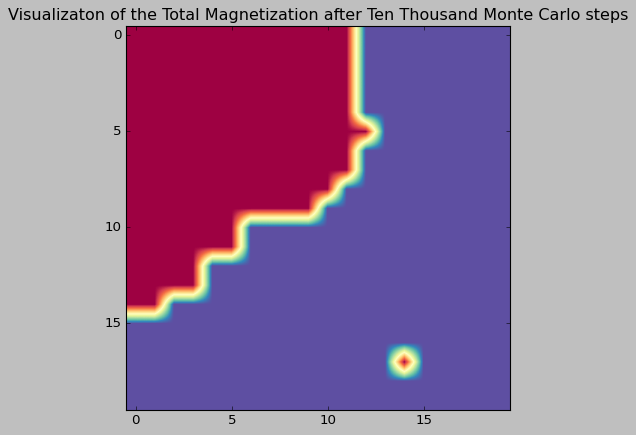

In [ ]:
plt.style.use("classic")
plt.imshow(state, cmap = "Spectral")
plt.title("Visualizaton of the Total Magnetization after Ten Thousand Monte Carlo steps")
plt.show()

In [ ]:
iterations = 1000000
M = []
for i in range(iterations+1):
    y,x = randint(0,N), randint(0,N)

    change_E = delta_E(y,x,state)

    state = metropolis_flip(change_E,y,x,state)

    total_magnetization = magnetization(state)
    M.append(total_magnetization)


plt.plot(arange(iterations+1), M)
plt.title("Total Magnetization of the System  for One Million Monte Carlo steps")
plt.xlabel("Monte Carlo steps")
plt.ylabel("Magnetization")
plt.show()

KeyboardInterrupt: ignored

In [ ]:
plt.style.use("classic")
plt.imshow(state, cmap = "Spectral")
plt.title("Visualizaton of the Total Magnetization after One Million Monte Carlo steps")
plt.show()

We can see that even from just one thousand iterations, that the system is already developing a "spontaneous magnetization" or a nonzero value of the overall magnetization, in this particular run, is leaning towards positive magnetization. What started as a lattice with a total magnetization averaging zero, over time spontaneously magnetizes to either a positive or a negative total magnetization.